In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


r_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep =';')

In [3]:
r_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
r_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Elbow curve')

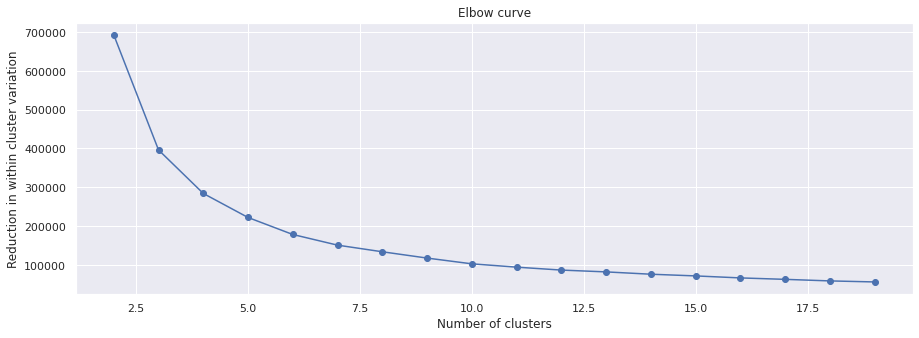

In [5]:
from sklearn.cluster import KMeans


within_cluster_variance = [] 

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(r_wine)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve')

This elbow chart shows the the total reduction in within cluster variation and it seems that the point at which there is diminishing returns to increasing the number of clusters is 6 clusters, so we will choose a k of 6

# 3. K-Means clustering with PCA

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(r_wine)

X = pd.DataFrame(scaler.transform(r_wine), index=r_wine.index, columns=r_wine.columns)

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)


KMeans(n_clusters=6)

In [7]:
kmeans.predict(X)

array([3, 3, 3, ..., 5, 3, 5], dtype=int32)

In [8]:
X['cluster'] = kmeans.labels_

 # means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.188637,-0.051583,0.400212,4.244759,0.206318,1.589869,1.742223,1.035402,-0.194548,0.085332,-0.315419,-0.222342
1,-0.041842,0.072370,0.069753,-0.100205,-0.030330,0.937458,1.187992,0.264947,-0.142706,-0.221541,-0.624626,-0.464036
2,1.378218,-0.689121,1.153195,0.102163,-0.004633,-0.565416,-0.546030,0.799599,-0.856073,0.341125,0.196998,0.422209
3,-0.488359,0.692672,-0.819448,-0.215142,-0.071351,-0.435428,-0.420443,-0.089672,0.429588,-0.418980,-0.409470,-0.460627
4,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
5,-0.620573,-0.472219,-0.123003,-0.225807,-0.384421,0.147014,-0.228804,-1.157740,0.543424,0.204058,1.236561,0.850795


1B)Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.


The wines that are of higher quality tend to have higher levels of alcohol, sulphates, and lower levels of volatile acidity, chlorides, total sulfur dioxides.

There are two different clusters of higher than average quality wines with contrasting values of associated values for fixed acidity, citric acid, residual sugar, free sulphur dioxide, density, and pH. I suspect that some of these differences are due to different winetypes being in the dataset as different winetypes have some different desired qualities.

The wines of lower quality tended to have higher levels of volatile acidity, and lower levels of fixed acidity, residual sugar, chlorides, sulphates, and alcohol. Also, thw wines with very high levels of chlorieds and sulphates tended to have lower quality.

1C) If I were going to make a good bottle of wine, then according to this analysis, I would make sure that it would have a higher than average level of alcohol, sulphates, and also make sure that it has lower levels of volatile acidity, chlorides, and total sulphur dioxides.

In [9]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=6,   
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)    
print(labels)

[0 0 0 ... 0 0 0]


In [54]:
X['cluster'] = labels
display(X.groupby('cluster').mean()) 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.270255,-0.365966,0.385833,-0.060183,-0.136496,0.168794,0.119721,-0.008226,-0.165051,0.087112,0.266283,0.273717
1,-0.014388,0.114091,0.701406,-0.320910,3.832987,-0.039731,0.699153,0.214768,-1.418645,3.404974,-0.792807,-0.453047
2,-0.524256,0.142859,0.257244,3.377962,-0.034206,1.705992,2.406546,0.652541,0.036754,0.038323,-0.246185,-0.433917
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.488601,0.691368,-0.818905,-0.212657,-0.068182,-0.432467,-0.416999,-0.084281,0.431925,-0.430664,-0.415364,-0.458138
5,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719


2B)Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

The wines that are of higher quality tend to have higher levels of alcohol and fixed acididty and lower levels of chlorides.

The wines of lower quality tended to have higher levels of sulphates, density, total sulphur dioxide, free sulphur dioxide, chlorides, and fixed acidity and lower levels of fixed acidity, pH and alcohol. 

Clusters of wines with both higher than average and lower than average values of quality both had higher than average levels of citric acid, total sulphur dioxide, sulphates and both had lower levels of pH.

2C) If I were going to make a good bottle of wine, then according to this analysis, I would make sure that it would have a higher than average level of alcohol, total sulphur dioxide, residual sugar and also make sure that it has lower levels of fixed acidity, volatile acidity, chlorides, density, pH and sulphates.

2D) The hierachical clustering algorith and the k-means clustering algorith agree on increased levels of alcohol being positively associated with quality, in both algorithms clusters with higher than average levels of quality had higher than average levels of alcohol. Both algorithms produce clusters with lower than average quality of wine with higher than average levels of volatile acidity, and chlorides. However, the two algorithms disagree on the effect of sulphates, with the kmeans algotith clustering higher than average sulphate wines with higher quality whereas the higher sulphate wines in the hierachical clustering algorithm were generall lower than average quality.

In [10]:
#3A)
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
df_plot = pd.DataFrame(pca.fit_transform(X), columns= ['PC1', 'PC2'], index=X.index)
df_plot

,PC1,PC2
0,-0.846148,1.899716
1,0.008667,1.904026
2,-0.225274,1.408882
3,2.029994,-1.550531
4,-0.846148,1.899716
...,...,...
1594,-1.387719,1.886684
1595,-2.932877,0.672602
1596,-2.543994,0.008883
1597,-1.436164,2.031050


In [44]:
pca.explained_variance_

array([3.12312087, 2.24328497])

In [45]:
#
first_two_pct = sum(pca.explained_variance_ratio_)
print(str(round(first_two_pct*100, 2)) + '% of the variation in the data can be explained by the first two components.')

44.69% of the variation in the data can be explained by the first two components.


3B) We find that the first two principal components explain about 45% of the total variation in the data.

In [46]:
pca.components_

array([[ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
        -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
        -0.07317678,  0.11248878],
       [-0.00417321,  0.33896786, -0.1373581 ,  0.16773634,  0.18978819,
         0.25948314,  0.36397137,  0.33078079, -0.06544015, -0.10933362,
        -0.50270865, -0.47316621]])

#3C) Instead of including all the original variables of the original dataset in a supervised learning algorith that would predict price, I could just include the first two principal components as features and I would capture 45% of the variation/information from the original dataset but only using 1/6th of the dimensions, thus helping to avoid the curse of dimensionality.